In [2]:
import pandas as pd

def convert_time_to_seconds(tempo_str):
    #verificar se o dado é nulo

    if pd.isna(tempo_str):
        return None
    
    parts = tempo_str.split(':')

    #converter
    minutes = float(parts[0])
    seconds = float(parts[1])

    total = (minutes * 60) + seconds

    return total
    

df = pd.read_csv('../data/raw/races_2023.csv')

df['Fastest_Lap_Time'] = df['Fastest_Lap_Time'].apply(convert_time_to_seconds)

df.head()



,Name,Date,Round,Url,Driver,Constructor,Grid,Position,Status,Points,Time_Millis,Fastest_Lap_Rank,Fastest_Lap_Time
0,Bahrain Grand Prix,2023-03-05,1,https://en.wikipedia.org/wiki/2023_Bahrain_Gra...,max_verstappen,red_bull,1,1,Finished,25,5636736.0,6.0,96.236
1,Bahrain Grand Prix,2023-03-05,1,https://en.wikipedia.org/wiki/2023_Bahrain_Gra...,perez,red_bull,2,2,Finished,18,5648723.0,7.0,96.344
2,Bahrain Grand Prix,2023-03-05,1,https://en.wikipedia.org/wiki/2023_Bahrain_Gra...,alonso,aston_martin,5,3,Finished,15,5675373.0,5.0,96.156
3,Bahrain Grand Prix,2023-03-05,1,https://en.wikipedia.org/wiki/2023_Bahrain_Gra...,sainz,ferrari,4,4,Finished,12,5684788.0,14.0,97.130
4,Bahrain Grand Prix,2023-03-05,1,https://en.wikipedia.org/wiki/2023_Bahrain_Gra...,hamilton,mercedes,7,5,Finished,10,5687713.0,10.0,96.546


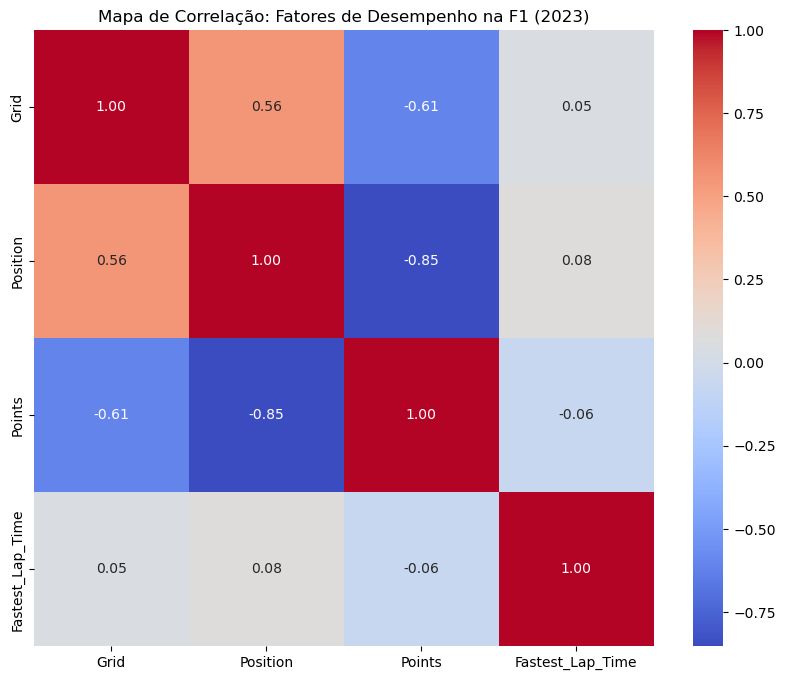

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

#selecionar as colunas que importam para a correlação
columns = ['Grid', 'Position', 'Points', 'Fastest_Lap_Time']

#criar matriz de correlação
correlation = df[columns].corr()

#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlação: Fatores de Desempenho na F1 (2023)')
plt.show()

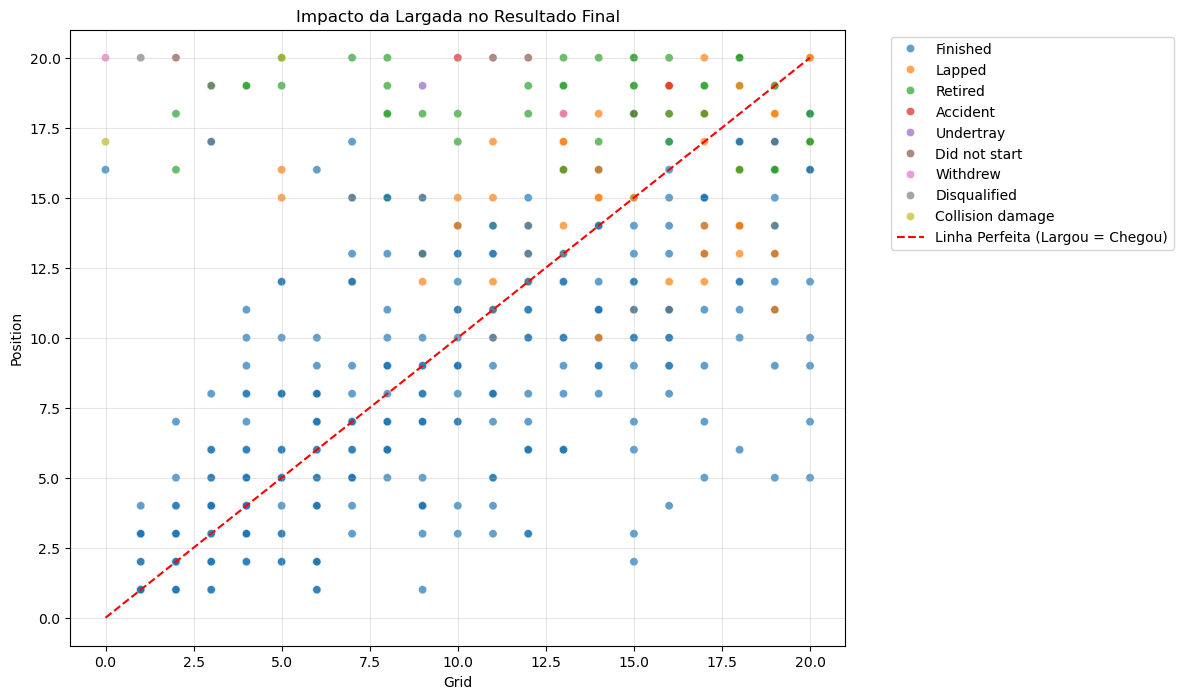

In [4]:
#gráfico para dispersão
plt.figure(figsize=(10, 8))

sns.scatterplot(data=df, x='Grid', y='Position', hue='Status', alpha=0.7)

plt.title('Impacto da Largada no Resultado Final')
plt.plot([0, 20], [0, 20], 'r--', label='Linha Perfeita (Largou = Chegou)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()